In [9]:
import glob
from IPython.display import display
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns 
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [16]:
path_in_train = "../data/raw/train.csv"
path_in_weather = "../data/raw/weather.csv"
path_in_test = "../data/raw/test.csv"

In [17]:
train_df = pd.read_csv(path_in_train)
weather_df = pd.read_csv(path_in_weather)
test_df = pd.read_csv(path_in_test)

In [18]:
train_df

kind      date  amount  mode_price      area
0      だいこん  20051107  201445       735.0        千葉
1      だいこん  20051108  189660       840.0  千葉_各地_青森
2      だいこん  20051110  218166       735.0  千葉_各地_青森
3      だいこん  20051111  182624       682.5     千葉_青森
4      だいこん  20051112  220691       682.5     千葉_青森
...     ...       ...     ...         ...       ...
97777   しめじ  20170526   17231        48.5     新潟_長野
97778   しめじ  20170527   17105        48.5     新潟_長野
97779   しめじ  20170529   12406        48.5     新潟_長野
97780   しめじ  20170530   12320        48.5     新潟_長野
97781   しめじ  20170531   11635        43.0     新潟_長野

[97782 rows x 5 columns]

In [20]:
weather_df

date  mean_temp  max_temp     max_temp_time  min_temp  \
0       20041106       13.1      20.1   2004/11/6 12:50       8.1   
1       20041107        9.6      12.5   2004/11/7 13:40       5.4   
2       20041108        9.0      15.5   2004/11/8 12:51       3.2   
3       20041109       12.2      17.7   2004/11/9 14:40       5.7   
4       20041110       11.6      16.4  2004/11/10 14:42       6.9   
...          ...        ...       ...               ...       ...   
204315  20220426       21.3      23.6   2022/4/26 14:27      17.9   
204316  20220427       23.0      27.7   2022/4/27 13:12      18.9   
204317  20220428       16.9      21.1   2022/4/28 15:03      14.2   
204318  20220429       12.9      16.4   2022/4/29 09:21       9.0   
204319  20220430       12.6      18.4   2022/4/30 14:49       7.4   

           min_temp_time  sum_rain  sun_time  mean_humid area  
0        2004/11/6 05:31       5.0       1.6        77.0   青森  
1        2004/11/7 22:17       0.0       4.1        63.0   青森  
2        2004/11/8 06:28       0.0       8.9        72.0   青森  
3        2004/11/9 02:49       1.5       1.2        85.0   青森  
4       2004/11/10 06:23       0.0       7.5        89.0   青森  
...                  ...       ...       ...         ...  ...  
204315   2022/4/26 04:17       2.5       0.0        89.0   東京  
204316    2022/4/28 0:00       0.5       1.6        79.0   東京  
204317   2022/4/28 22:40       0.0       5.5        57.0   東京  
204318   2022/4/29 23:55      40.0       0.2        86.0   東京  
204319   2022/4/30 05:28       0.0      12.4        64.0   東京  

[204320 rows x 10 columns]

In [13]:
test_df

kind      date      area
0     だいこん  20220502  千葉_各地_青森
1     だいこん  20220506  千葉_各地_青森
2     だいこん  20220507  千葉_各地_青森
3     だいこん  20220509  千葉_各地_青森
4     だいこん  20220510  千葉_各地_青森
..     ...       ...       ...
315  ミニトマト  20220526     各地_愛知
316  ミニトマト  20220527     各地_愛知
317  ミニトマト  20220528     各地_愛知
318  ミニトマト  20220530     各地_愛知
319  ミニトマト  20220531     各地_愛知

[320 rows x 3 columns]

In [5]:
test_df.shape

(19466, 27)

In [6]:
all_df = pd.concat([train_df, test_df]).reset_index(drop=True)
all_df.shape

(656817, 28)

# 型、項目数、欠損値

In [7]:
dtypes = []
val_counts_train = []
val_counts_test = []
isnull_train = []
isnull_test = []
isnull_train_ratio = 100 * train_df.isnull().sum() / len(train_df)
isnull_test_ratio = 100 * test_df.isnull().sum() / len(test_df)
for col in test_df.columns:
    dtypes.append(str(train_df[col].dtype))
    val_counts_train.append(len(train_df[col].value_counts()))
    val_counts_test.append(len(test_df[col].value_counts()))
    isnull_train.append(isnull_train_ratio[col])
    isnull_test.append(isnull_test_ratio[col])

In [8]:
inds = ["型", "val_counts_train", "val_counts_test", "NaN率_train", "NaN率_test"]
df_eda = pd.DataFrame([dtypes, val_counts_train, val_counts_test, isnull_train, isnull_test], columns=test_df.columns, index=inds).T
df_eda.query("val_counts_train > 1")

型 val_counts_train val_counts_test NaN率_train  NaN率_test
ID           int64           637351           19466          0          0
市区町村コード      int64              618             526          0          0
都道府県名       object               47              47          0          0
市区町村名       object              618             526          0          0
地区名         object            12046            5515  0.0456577  0.0154115
最寄駅：名称      object             3831            2550    0.41092  0.0667831
最寄駅：距離（分）   object               34              34    3.61575  0.0667831
間取り         object               63              27    3.41131    4.73646
面積（㎡）       object              195              48          0          0
建築年         object               76              59     2.8609     3.4008
建物の構造       object               12               8     2.1853    6.49851
用途          object               22              10    7.23887    30.7511
今後の利用目的     object                4               4    56.8384    5.27587
都市計画        object               16              15    2.91284    1.76718
建ぺい率（％）    float64                6               6    3.53071    2.16275
容積率（％）     float64               17              13    3.53071    2.16275
取引時点        object               58               2          0          0
改装          object                2               2    8.93071    12.4833
取引の事情等      object                9               5    97.1327    99.2192

In [9]:
####
# 値の種類が1種類以下のものを除外　
drop_cols = all_df.nunique()[all_df.nunique() <= 1].index
train_df = train_df.drop(columns=drop_cols)
test_df = test_df.drop(columns=drop_cols)
all_df = all_df.drop(columns=drop_cols)

In [10]:
train_df.head()

ID  市区町村コード 都道府県名   市区町村名     地区名      最寄駅：名称 最寄駅：距離（分）   間取り 面積（㎡）  \
0  1060685     1108   北海道  札幌市厚別区    大谷地東         大谷地         8  ３ＬＤＫ    80   
1  1005580     1101   北海道  札幌市中央区    南９条西        中島公園         5   １ＤＫ    30   
2  1001363     1101   北海道  札幌市中央区    北３条西       西１１丁目        11  ３ＬＤＫ    65   
3  1052374     1108   北海道  札幌市厚別区  厚別中央２条  ひばりが丘(北海道)         5  ４ＬＤＫ    90   
4  1059107     1108   北海道  札幌市厚別区   厚別東４条       新さっぽろ        12  ４ＬＤＫ    80   

     建築年 建物の構造   用途 今後の利用目的    都市計画  建ぺい率（％）  容積率（％）        取引時点   改装 取引の事情等  \
0   平成7年   ＳＲＣ   住宅     NaN   準工業地域     60.0   200.0  2009年第４四半期  未改装    NaN   
1  昭和57年   ＳＲＣ  NaN      住宅  近隣商業地域     80.0   300.0  2018年第３四半期  未改装    NaN   
2   平成3年   ＳＲＣ   住宅     NaN  近隣商業地域     80.0   300.0  2010年第２四半期  未改装    NaN   
3  平成27年    ＲＣ   住宅      住宅    商業地域     80.0   400.0  2015年第３四半期  未改装    NaN   
4  昭和57年    ＲＣ   住宅     NaN   準工業地域     60.0   200.0  2012年第４四半期  未改装    NaN   

   取引価格（総額）_log  
0      7.079181  
1      6.755875  
2      7.204120  
3      7.591065  
4      6.875061

# 基本統計量

In [11]:
all_df.describe()

ID        市区町村コード        建ぺい率（％）         容積率（％）  \
count  6.568170e+05  656817.000000  633893.000000  633893.000000   
mean   1.847857e+07   18514.986046      67.623447     301.903981   
std    9.566279e+06    9592.863791      10.404475     148.211553   
min    1.000000e+06    1101.000000      30.000000      50.000000   
25%    1.306371e+07   13107.000000      60.000000     200.000000   
50%    1.402798e+07   14104.000000      60.000000     200.000000   
75%    2.703184e+07   27114.000000      80.000000     400.000000   
max    4.703203e+07   47213.000000      80.000000    1300.000000   

        取引価格（総額）_log  
count  637351.000000  
mean        7.217424  
std         0.353935  
min         2.653213  
25%         7.000000  
50%         7.255273  
75%         7.447158  
max         9.934498

# 地区名
欠損値：最寄り駅:名称が同じやつで埋められそう

In [12]:
train_df[(train_df["地区名"].isnull()==True) & (train_df["都道府県名"]=="神奈川県")].head()

ID  市区町村コード 都道府県名   市区町村名  地区名  最寄駅：名称 最寄駅：距離（分）   間取り 面積（㎡）  \
6809   14179517    14103  神奈川県   横浜市西区  NaN  みなとみらい       NaN  ２ＬＤＫ    65   
11940  14271122    14134  神奈川県  川崎市高津区  NaN    武蔵新城       NaN  ３ＬＤＫ    60   
12519  14271123    14134  神奈川県  川崎市高津区  NaN    武蔵新城       NaN  ３ＬＤＫ    60   
13435  14201433    14134  神奈川県  川崎市高津区  NaN      鷺沼   30分?60分  ３ＬＤＫ    60   
16666  14179516    14103  神奈川県   横浜市西区  NaN  みなとみらい       NaN  １Ｒ＋Ｓ    60   

         建築年 建物の構造  用途 今後の利用目的     都市計画  建ぺい率（％）  容積率（％）        取引時点   改装  \
6809   平成15年    ＲＣ  住宅     NaN      NaN      NaN     NaN  2005年第４四半期  未改装   
11940   平成7年    ＲＣ  住宅     NaN  第１種住居地域     60.0   200.0  2006年第２四半期  改装済   
12519   平成7年    ＲＣ  住宅     NaN  第１種住居地域     60.0   200.0  2006年第２四半期  改装済   
13435   平成7年    ＲＣ  住宅     NaN  第１種住居地域     60.0   200.0  2009年第３四半期  改装済   
16666  平成15年    ＲＣ  住宅     NaN      NaN      NaN     NaN  2006年第１四半期  未改装   

      取引の事情等  取引価格（総額）_log  
6809     NaN      7.806180  
11940    NaN      7.255273  
12519    NaN      7.255273  
13435    NaN      7.146128  
16666    NaN      7.838849

In [13]:
train_df[train_df["最寄駅：名称"]=="みなとみらい"].head()

ID  市区町村コード 都道府県名  市区町村名     地区名  最寄駅：名称 最寄駅：距離（分）   間取り 面積（㎡）  \
66    14009351    14103  神奈川県  横浜市西区  みなとみらい  みなとみらい         1  ３ＬＤＫ    80   
150   14072145    14103  神奈川県  横浜市西区  みなとみらい  みなとみらい         1  ３ＬＤＫ    95   
509   14009344    14103  神奈川県  横浜市西区  みなとみらい  みなとみらい         3  １ＬＤＫ    60   
891   14009295    14103  神奈川県  横浜市西区  みなとみらい  みなとみらい         3  ２ＬＤＫ    70   
1060  14065640    14103  神奈川県  横浜市西区  みなとみらい  みなとみらい         4  ３ＬＤＫ    90   

        建築年 建物の構造  用途 今後の利用目的  都市計画  建ぺい率（％）  容積率（％）        取引時点   改装 取引の事情等  \
66    平成19年    ＲＣ  住宅      住宅  商業地域     80.0   600.0  2016年第３四半期  未改装    NaN   
150   平成18年    ＲＣ  住宅     その他  商業地域     80.0   600.0  2014年第３四半期  未改装    NaN   
509   平成15年    ＲＣ  住宅      住宅  商業地域     80.0   600.0  2016年第３四半期  NaN    NaN   
891   平成15年    ＲＣ  住宅      住宅  商業地域     80.0   600.0  2018年第３四半期  改装済    NaN   
1060  平成18年    ＲＣ  住宅     NaN  商業地域     80.0   600.0  2010年第４四半期  未改装    NaN   

      取引価格（総額）_log  
66        7.949390  
150       7.919078  
509       7.724276  
891       7.845098  
1060      8.000000

In [84]:
# trainにないデータがtestに存在する、別々に前処理するのは悪手か
for i in test_df["地区名"].value_counts().index:
    if i in set(train_df["地区名"].value_counts().index):
        pass
    else:
        print(i)

none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none


# 最寄駅：距離（分）
表記ゆれの除去

数値変数に変換する

外れ値：グループ平均、予測

In [14]:
####
d = {
    "30分?60分": 45,
    "1H?1H30": 75,
    "2H?": 120,
    "1H30?2H": 105,
}
all_df["最寄駅：距離（分）"] = all_df["最寄駅：距離（分）"].replace(d)
all_df["最寄駅：距離（分）"] = all_df["最寄駅：距離（分）"].astype(float)

In [15]:
all_df["最寄駅：距離（分）"].describe()

count    633759.000000
mean         11.705222
std          12.175961
min           0.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         120.000000
Name: 最寄駅：距離（分）, dtype: float64

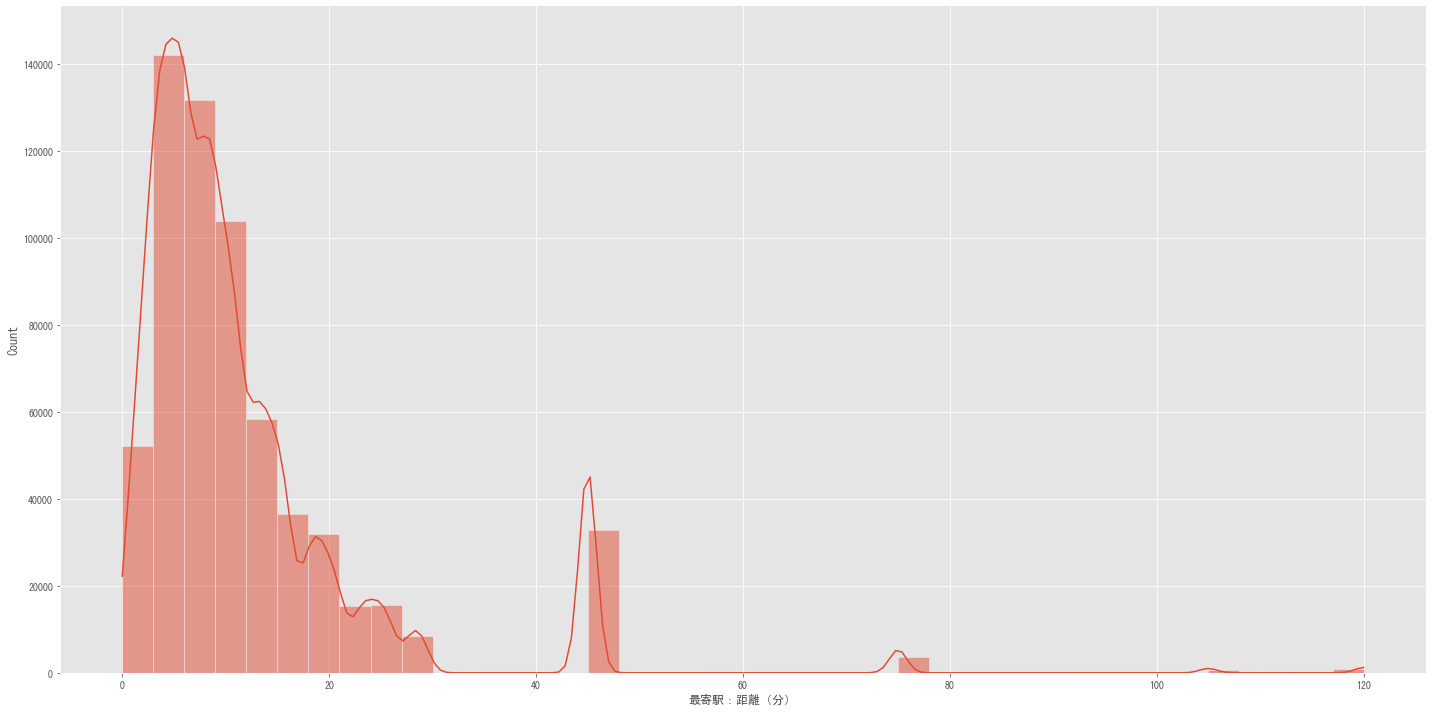

In [16]:
plt.rcParams["font.family"] = "MS Gothic"
sns.displot(all_df['最寄駅：距離（分）'], bins=40, kde=True, height=10, aspect=2)

# 間取り
特徴量生成：部屋数

In [17]:
all_df["間取り"].value_counts()

３ＬＤＫ       280137
１Ｋ          95609
２ＬＤＫ        94456
４ＬＤＫ        60054
１ＬＤＫ        27755
２ＤＫ         20955
１ＤＫ         19124
３ＤＫ         12100
１Ｒ           6935
オープンフロア      5290
２ＬＤＫ＋Ｓ       3857
４ＤＫ          1722
２Ｋ           1303
１ＬＤＫ＋Ｓ       1109
３ＬＤＫ＋Ｓ        916
５ＬＤＫ          845
３Ｋ            481
２ＤＫ＋Ｓ         446
４ＬＤＫ＋Ｓ        166
４Ｋ            159
３ＬＫ           111
５ＤＫ            95
スタジオ           84
１ＤＫ＋Ｓ          78
３ＤＫ＋Ｓ          72
６ＬＤＫ           36
メゾネット          29
５ＬＤＫ＋Ｓ         29
４ＤＫ＋Ｓ          22
２ＬＫ            21
１Ｋ＋Ｓ           20
１Ｒ＋Ｓ           17
１ＬＫ            13
２Ｋ＋Ｓ           11
３ＬＤ            10
２ＬＤ＋Ｓ           9
４Ｌ＋Ｋ            8
１Ｌ              8
３ＬＤＫ＋Ｋ          7
３ＬＤ＋Ｓ           5
６ＤＫ             5
７ＬＤＫ            5
５Ｋ              4
２ＬＫ＋Ｓ           4
４ＬＤＫ＋Ｋ          3
３Ｋ＋Ｓ            3
１ＬＤ＋Ｓ           3
６ＬＤＫ＋Ｓ          3
７ＬＤＫ＋Ｓ          2
３Ｄ              2
８ＬＤＫ            2
２Ｌ              2
２Ｄ              1
４Ｌ              1
２ＬＤＫ＋Ｋ          1
７ＤＫ       

# 面積（㎡）
数値変数に変換

外れ値

2000か否か

In [18]:
####
all_df.loc[:, '面積（㎡）'] = all_df["面積（㎡）"].replace({'2000㎡以上': "2000", "5000㎡以上": "5000"})
all_df.loc[:, '面積（㎡）'] = all_df["面積（㎡）"].astype(int)
all_df.loc[:, "面積_2000"] = all_df["面積（㎡）"] == 2000

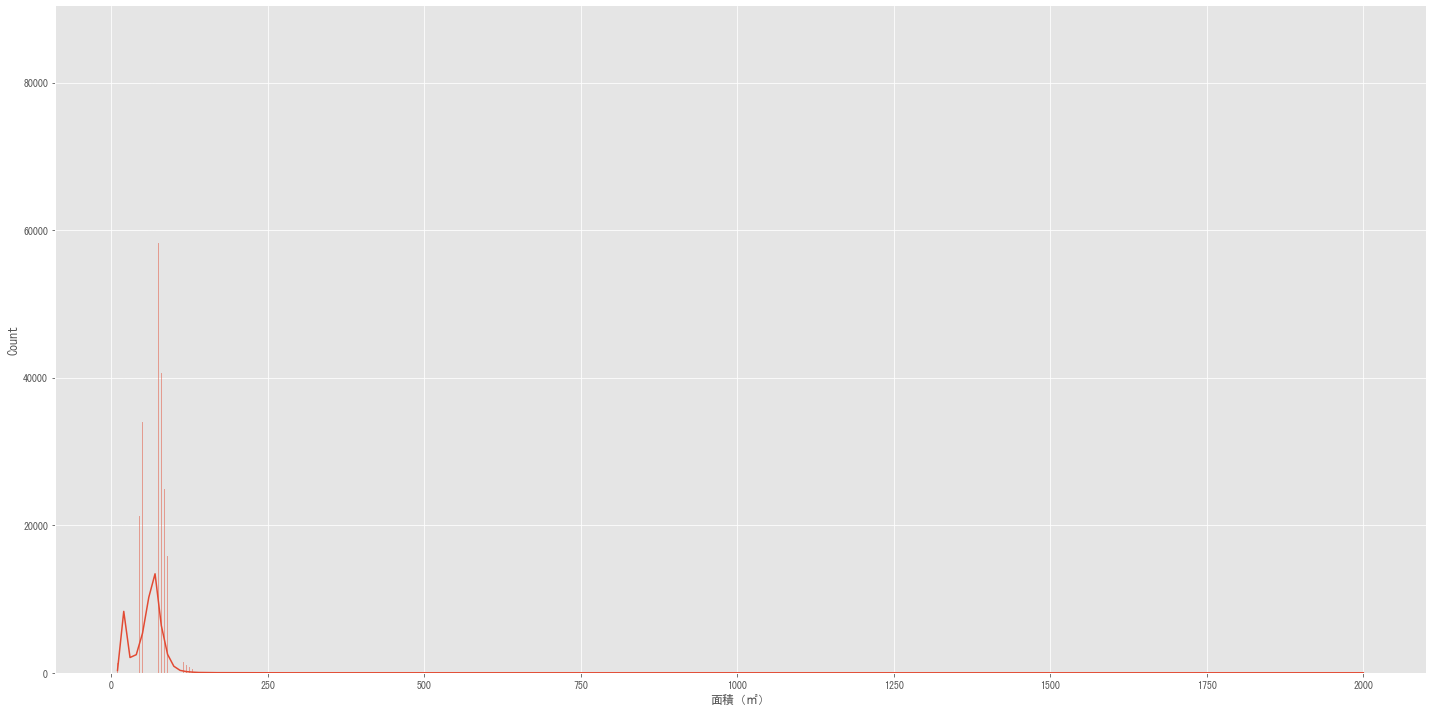

In [19]:
plt.rcParams["font.family"] = "MS Gothic"
sns.displot(all_df['面積（㎡）'], kde=True, height=10, aspect=2)

# 建築年
西暦に変換、数値変数に変換

欠損値：地区名とかのグループ平均

経過年月：取引年から建築年を引いて、経過年月を算出した。

In [20]:
####
d = {}
for val in all_df["建築年"].value_counts().keys():
    if "平成" in val:
        _year = int(val.split("平成")[1].split("年")[0])
        year = 1988 + _year
    if "昭和" in val:
        _year = int(val.split("昭和")[1].split("年")[0])
        year = 1925 + _year
    if "令和" in val:
        _year = int(val.split("令和")[1].split("年")[0])
        year = 2018 + _year
    d[val] = year
d["戦前"] = 1945
all_df.loc[:, "建築年"] = all_df["建築年"].replace(d)

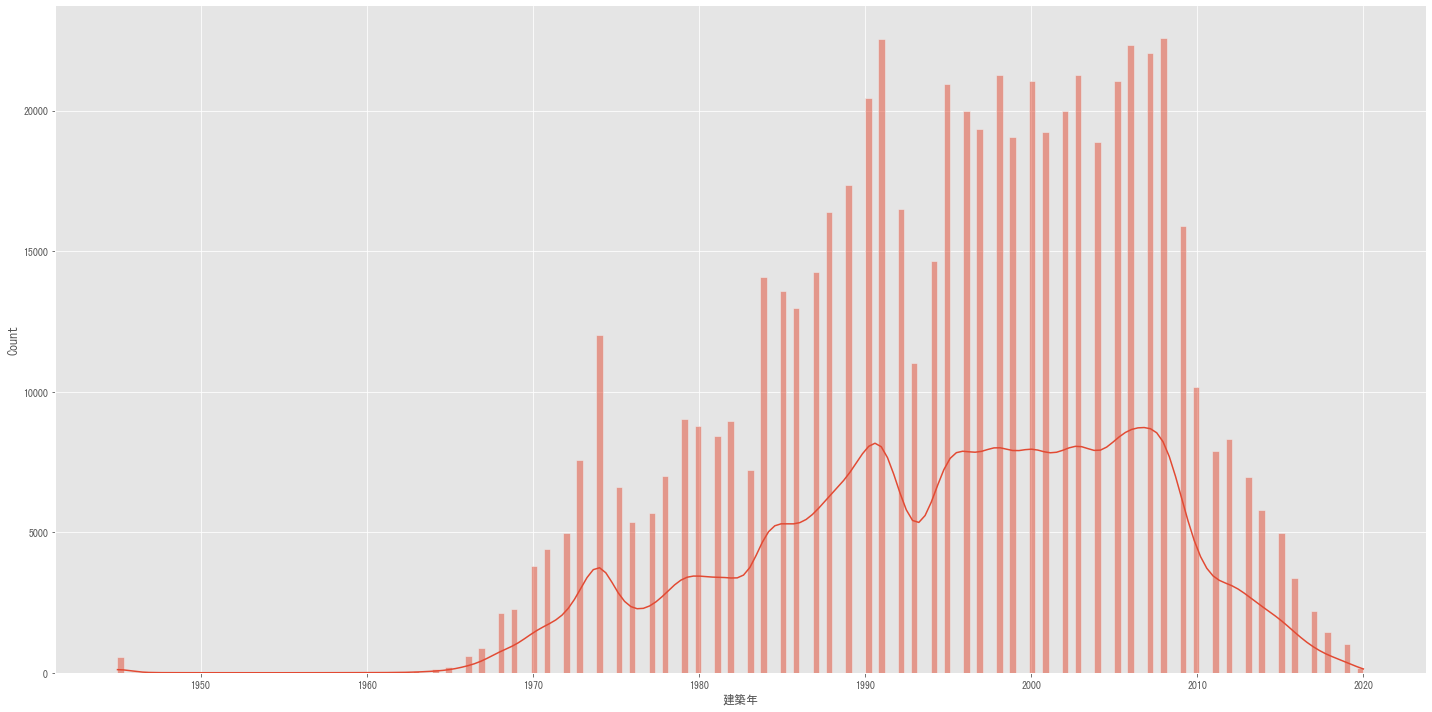

In [21]:
plt.rcParams["font.family"] = "MS Gothic"
sns.displot(all_df['建築年'], kde=True, height=10, aspect=2)

In [22]:
all_df[all_df["建築年"].isnull()]

ID  市区町村コード 都道府県名   市区町村名    地区名     最寄駅：名称  最寄駅：距離（分）   間取り  \
31       1039125     1105   北海道  札幌市豊平区   福住１条         福住        6.0  ３ＬＤＫ   
68       1132874     1217   北海道     江別市  東野幌本町         野幌        7.0  ４ＬＤＫ   
86       1005970     1101   北海道  札幌市中央区   南８条西       中島公園        7.0  ３ＬＤＫ   
121      1032368     1104   北海道  札幌市白石区   北郷６条  白石(ＪＲ北海道)       14.0  ４ＬＤＫ   
122      1071175     1203   北海道     小樽市     新光         朝里       10.0  ３ＬＤＫ   
...          ...      ...   ...     ...    ...        ...        ...   ...   
656771  46019184    46218  鹿児島県     霧島市   国分中央    国分(鹿児島)        7.0   NaN   
656772  46019185    46218  鹿児島県     霧島市   国分中央    国分(鹿児島)        5.0  ３ＬＤＫ   
656795  47001227    47201   沖縄県     那覇市     長田         安里       45.0  ３ＬＤＫ   
656808  47003387    47208   沖縄県     浦添市     伊祖         古島       45.0  ２ＬＤＫ   
656810  47003634    47208   沖縄県     浦添市     沢岻        NaN        NaN  ２ＬＤＫ   

        面積（㎡）  建築年 建物の構造   用途 今後の利用目的                    都市計画  建ぺい率（％）  \
31         70  NaN    ＲＣ   住宅      住宅                     NaN      NaN   
68         85  NaN   ＳＲＣ   住宅     NaN                   準工業地域     60.0   
86         75  NaN   ＳＲＣ   住宅      住宅                     NaN      NaN   
121        95  NaN    ＲＣ   住宅      住宅            第２種中高層住居専用地域     60.0   
122       105  NaN    ＲＣ   住宅      住宅                     NaN      NaN   
...       ...  ...   ...  ...     ...                     ...      ...   
656771     80  NaN   NaN  NaN      住宅  市街化区域及び市街化調整区域外の都市計画区域      NaN   
656772     85  NaN   NaN  NaN      住宅  市街化区域及び市街化調整区域外の都市計画区域      NaN   
656795     75  NaN   ＳＲＣ   住宅      住宅            第１種中高層住居専用地域     60.0   
656808     60  NaN    ＲＣ   住宅      住宅            第１種中高層住居専用地域     60.0   
656810     75  NaN    ＲＣ  NaN      住宅             第１種低層住居専用地域     50.0   

        容積率（％）        取引時点   改装 取引の事情等  取引価格（総額）_log  面積_2000  
31         NaN  2015年第１四半期  改装済    NaN      7.230449    False  
68       200.0  2012年第３四半期  未改装    NaN      7.041393    False  
86         NaN  2014年第２四半期  改装済    NaN      7.079181    False  
121      200.0  2014年第２四半期  改装済    NaN      7.146128    False  
122        NaN  2017年第４四半期  改装済    NaN      7.146128    False  
...        ...         ...  ...    ...           ...      ...  
656771     NaN  2020年第１四半期  NaN    NaN           NaN    False  
656772     NaN  2020年第１四半期  NaN    NaN           NaN    False  
656795   200.0  2020年第１四半期  改装済    NaN           NaN    False  
656808   200.0  2020年第１四半期  未改装    NaN           NaN    False  
656810   100.0  2020年第１四半期  改装済    NaN           NaN    False  

[18896 rows x 21 columns]

# 建物の構造
SRCとRC+鉄骨造とか同じなのでは

欠損値：RCで埋める

In [23]:
all_df["建物の構造"].value_counts() / len(all_df)

ＲＣ            0.676015
ＳＲＣ           0.292205
鉄骨造           0.006676
ＳＲＣ、ＲＣ        0.001060
ＲＣ、鉄骨造        0.000492
ＳＲＣ、鉄骨造       0.000225
木造            0.000129
ブロック造         0.000033
軽量鉄骨造         0.000027
ＳＲＣ、ＲＣ、鉄骨造    0.000003
ＲＣ、ブロック造      0.000002
ＲＣ、木造         0.000002
Name: 建物の構造, dtype: float64

# 用途
複合用途をメイン用途とサブ用途に分割

住宅に偏りすぎてあまり役立たなそう

欠損値：テストデータに多い、今後の利用目的で埋める、残りは都市計画から埋めてもいいかも

In [24]:
train_df.pivot_table(index="用途", values="取引価格（総額）_log", aggfunc=["mean","count"]).sort_values(('mean', '取引価格（総額）_log'))
# ..,margins=True, margins_name="total") # 総計を追加
# categoryは.sort_values(('mean', 'state'))して並び替えて使用する、数値は並び替えない

mean        count
              取引価格（総額）_log 取引価格（総額）_log
用途                                     
駐車場               6.626793           98
倉庫                6.641093           53
その他               6.820358          777
駐車場、店舗            6.840892            2
住宅、店舗、その他         6.903090            1
事務所、駐車場           6.939519            1
倉庫、駐車場            6.942198            3
事務所               6.980179         3518
住宅、店舗             6.981711           53
店舗                7.148417         2854
住宅                7.216114       583722
倉庫、店舗             7.216245            4
住宅、その他            7.218654           15
工場                7.233756            7
住宅、事務所            7.239629           34
事務所、店舗            7.254988           60
住宅、事務所、駐車場、店舗     7.505150            1
作業場               7.516712            2
事務所、倉庫            7.565167            2
住宅、駐車場            7.676091            4
住宅、倉庫             7.740363            1
店舗、その他            8.278151            2

In [25]:
test_df["用途"].value_counts() / len(test_df)

住宅        0.686274
事務所       0.002620
店舗        0.002312
その他       0.000719
事務所、店舗    0.000205
倉庫        0.000154
住宅、店舗     0.000051
駐車場       0.000051
住宅、その他    0.000051
住宅、駐車場    0.000051
Name: 用途, dtype: float64

In [26]:
all_len = len(all_df.query("用途 == 今後の利用目的")[all_df["今後の利用目的"].notnull() & all_df["用途"].notnull()])
same_len = len(all_df[all_df["今後の利用目的"].notnull() & all_df["用途"].notnull()])
all_len / same_len

C:\Users\ishizuka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.9330326871073421

# 都市計画



In [27]:
pd.DataFrame({"count": all_df.groupby("都市計画").count()["取引価格（総額）_log"].values / len(train_df["都市計画"].notnull()),
              "mean": all_df.groupby("都市計画").mean()["取引価格（総額）_log"].values
             }, index=all_df.groupby("都市計画").count().index)

count      mean
都市計画                                      
商業地域                    0.270852  7.236131
工業地域                    0.025025  7.256713
工業専用地域                  0.000348  7.470191
市街化区域及び市街化調整区域外の都市計画区域  0.000471  6.882468
市街化調整区域                 0.006347  6.853043
準住居地域                   0.019890  7.233808
準工業地域                   0.113945  7.276750
準都市計画区域                 0.000011  7.214626
第１種中高層住居専用地域            0.156099  7.176415
第１種低層住居専用地域             0.030453  7.316971
第１種住居地域                 0.153084  7.171029
第２種中高層住居専用地域            0.046235  7.186162
第２種低層住居専用地域             0.001365  7.356479
第２種住居地域                 0.046070  7.264304
近隣商業地域                  0.100336  7.224564
都市計画区域外                 0.000340  6.082810

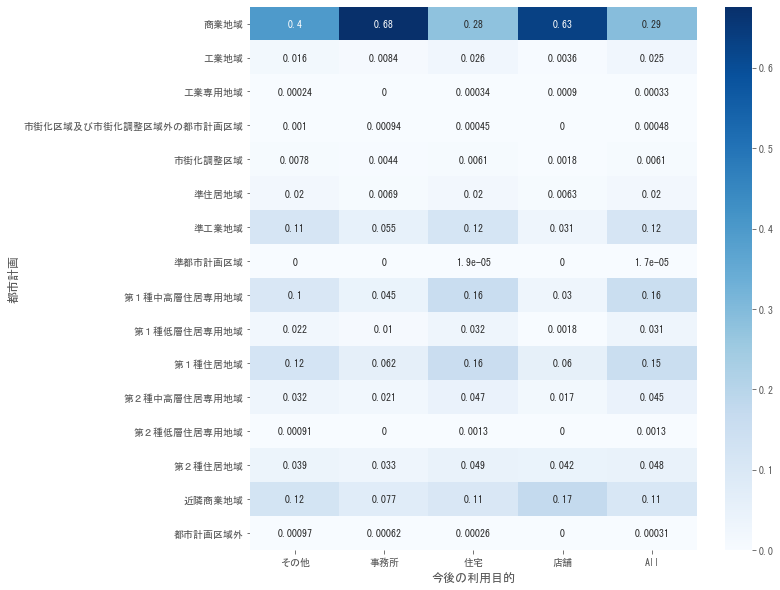

In [28]:
df = pd.crosstab(all_df['都市計画'], all_df['今後の利用目的'], margins=True, normalize="columns")
plt.figure(figsize=(10, 10))
sns.heatmap(df, annot=True, cmap="Blues")
plt.show()

# 建ぺい率（％）
https://suumo.jp/article/oyakudachi/oyaku/chumon/c_knowhow/kenpei_youseki/

特徴量作成：面積と建ぺい率（％）から敷地面積出せそう

欠損値：グループ平均かな

都市計画で相対値

In [29]:
pd.DataFrame({"count": all_df.groupby("建ぺい率（％）").count()["取引価格（総額）_log"].values,
              "mean": all_df.groupby("建ぺい率（％）").mean()["取引価格（総額）_log"].values
             }, index=all_df.groupby("建ぺい率（％）").count().index)

count      mean
建ぺい率（％）                  
30.0        460  7.349271
40.0       4609  7.297642
50.0      14152  7.257610
60.0     349347  7.208463
70.0        406  6.905904
80.0     245874  7.232564

In [30]:
test_df["建ぺい率（％）"].value_counts()

60.0    10271
80.0     8247
50.0      383
40.0      122
30.0       12
70.0       10
Name: 建ぺい率（％）, dtype: int64

# 容積率（％）
欠損値：建ぺい率のグループ平均とかかな

In [31]:
all_df["容積率（％）"]

0         200.0
1         300.0
2         300.0
3         400.0
4         200.0
          ...  
656812    400.0
656813    200.0
656814    200.0
656815    200.0
656816    200.0
Name: 容積率（％）, Length: 656817, dtype: float64

(array([3.95080e+04, 3.01925e+05, 1.94645e+05, 4.21080e+04, 3.96020e+04,
        8.60700e+03, 7.10900e+03, 3.67000e+02, 6.00000e+00, 1.60000e+01]),
 array([  50.,  175.,  300.,  425.,  550.,  675.,  800.,  925., 1050.,
        1175., 1300.]),
 <BarContainer object of 10 artists>)

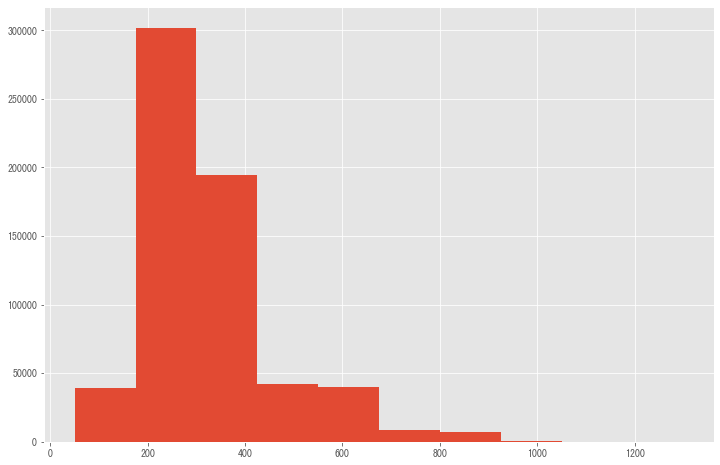

In [32]:
plt.figure(figsize=(12, 8))
plt.hist(all_df["容積率（％）"])

C:\Users\ishizuka\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='建ぺい率（％）', ylabel='容積率（％）'>

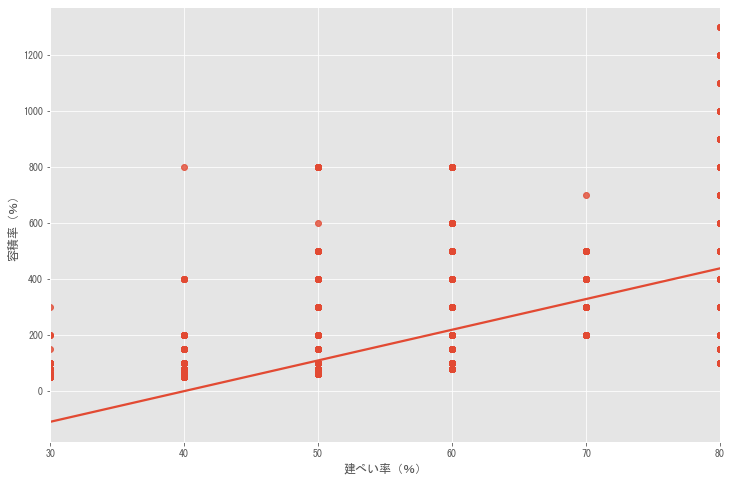

In [33]:
plt.figure(figsize=(12,8))
sns.regplot(all_df['建ぺい率（％）'], all_df['容積率（％）'], fit_reg=True) 
#s：大きさ　c：カラー　maker：点の形　alpha：透明度

# 取引時点
数値変数に変換

時系列トレンドあり

In [34]:
####
import re
all_df.loc[:, "取引時点"] = all_df["取引時点"].apply(lambda x : re.sub('年第１四半期', '.00', x))
all_df.loc[:, "取引時点"] = all_df["取引時点"].apply(lambda x : re.sub('年第２四半期', '.25', x))
all_df.loc[:, "取引時点"] = all_df["取引時点"].apply(lambda x : re.sub('年第３四半期', '.50', x))
all_df.loc[:, "取引時点"] = all_df["取引時点"].apply(lambda x : re.sub('年第４四半期', '.75', x))
all_df.loc[:, "取引時点"] = all_df["取引時点"].apply(float)

all_df.loc[:, "取引年"] = all_df["取引時点"].apply(round)

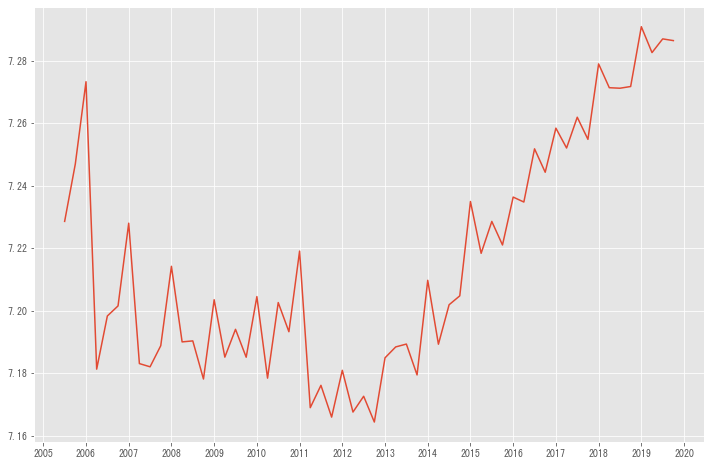

In [35]:
plt.figure(figsize=(12, 8))
plt.plot(all_df.groupby("取引時点").mean()["取引価格（総額）_log"].index,
         all_df.groupby("取引時点").mean()["取引価格（総額）_log"].values,)
plt.xticks([i for i in range(2005, 2021, 1)])
plt.show()

# 改装
欠損値：最頻値でよさそう

In [36]:
pd.DataFrame({"count": all_df.groupby("改装").count()["取引価格（総額）_log"].values / len(train_df["改装"].notnull()),
              "mean": all_df.groupby("改装").mean()["取引価格（総額）_log"].values
             }, index=all_df.groupby("改装").count().index)

count      mean
改装                     
改装済  0.252864  7.218414
未改装  0.657829  7.220355

# 取引の事情等
まあ削除かな

In [37]:
pd.DataFrame({"count": all_df.groupby("取引の事情等").count()["取引価格（総額）_log"].values / len(train_df["改装"].notnull()),
              "mean": all_df.groupby("取引の事情等").mean()["取引価格（総額）_log"].values
             }, index=all_df.groupby("取引の事情等").count().index)

count      mean
取引の事情等                              
その他事情有り           0.000152  7.034515
他の権利・負担付き         0.000072  7.027541
他の権利・負担付き、調停・競売等  0.000003  7.218081
瑕疵有りの可能性          0.000102  6.727164
調停・競売等            0.026974  6.976581
調停・競売等、瑕疵有りの可能性   0.000003  6.789892
関係者間取引            0.001362  7.020199
関係者間取引、瑕疵有りの可能性   0.000002  6.875061
関係者間取引、調停・競売等     0.000003  7.068043

# 被説明変数：取引価格（総額）_log

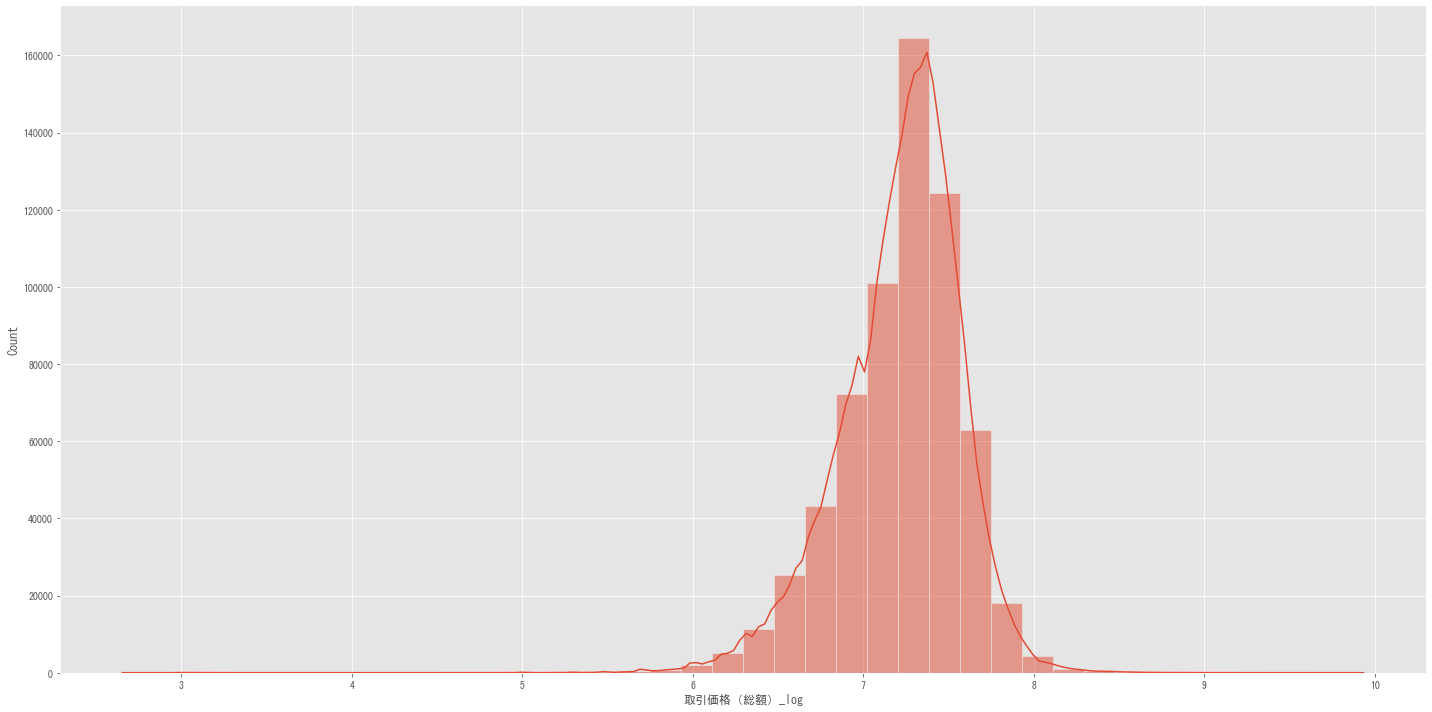

In [38]:
sns.displot(all_df['取引価格（総額）_log'], bins=40, kde=True, height=10, aspect=2)

In [39]:
all_df.describe()

ID        市区町村コード      最寄駅：距離（分）          面積（㎡）  \
count  6.568170e+05  656817.000000  633759.000000  656817.000000   
mean   1.847857e+07   18514.986046      11.705222      58.607390   
std    9.566279e+06    9592.863791      12.175961      26.717929   
min    1.000000e+06    1101.000000       0.000000      10.000000   
25%    1.306371e+07   13107.000000       5.000000      45.000000   
50%    1.402798e+07   14104.000000       8.000000      65.000000   
75%    2.703184e+07   27114.000000      14.000000      75.000000   
max    4.703203e+07   47213.000000     120.000000    2000.000000   

                 建築年        建ぺい率（％）         容積率（％）           取引時点  \
count  637921.000000  633893.000000  633893.000000  656817.000000   
mean     1995.096793      67.623447     301.903981    2013.583947   
std        11.542970      10.404475     148.211553       3.991302   
min      1945.000000      30.000000      50.000000    2005.500000   
25%      1987.000000      60.000000     200.000000    2010.250000   
50%      1996.000000      60.000000     200.000000    2013.750000   
75%      2004.000000      80.000000     400.000000    2017.000000   
max      2020.000000      80.000000    1300.000000    2020.250000   

        取引価格（総額）_log            取引年  
count  637351.000000  656817.000000  
mean        7.217424    2013.591151  
std         0.353935       4.008159  
min         2.653213    2006.000000  
25%         7.000000    2010.000000  
50%         7.255273    2014.000000  
75%         7.447158    2017.000000  
max         9.934498    2020.000000

In [40]:
all_df[:len(train_df)].describe()

ID        市区町村コード      最寄駅：距離（分）          面積（㎡）  \
count  6.373510e+05  637351.000000  614306.000000  637351.000000   
mean   1.847926e+07   18513.985300      11.731487      58.663570   
std    9.570100e+06    9596.722442      12.197090      26.712019   
min    1.000007e+06    1101.000000       0.000000      10.000000   
25%    1.306635e+07   13106.000000       5.000000      45.000000   
50%    1.402985e+07   14104.000000       8.000000      65.000000   
75%    2.703272e+07   27114.000000      14.000000      75.000000   
max    4.703203e+07   47213.000000     120.000000    2000.000000   

                 建築年        建ぺい率（％）         容積率（％）           取引時点  \
count  619117.000000  614848.000000  614848.000000  637351.000000   
mean     1995.021920      67.601944     301.601876    2013.385702   
std        11.496701      10.402295     148.105400       3.884657   
min      1945.000000      30.000000      50.000000    2005.500000   
25%      1987.000000      60.000000     200.000000    2010.250000   
50%      1996.000000      60.000000     200.000000    2013.500000   
75%      2004.000000      80.000000     400.000000    2016.750000   
max      2020.000000      80.000000    1300.000000    2019.750000   

        取引価格（総額）_log            取引年  
count  637351.000000  637351.000000  
mean        7.217424    2013.395412  
std         0.353935       3.906818  
min         2.653213    2006.000000  
25%         7.000000    2010.000000  
50%         7.255273    2014.000000  
75%         7.447158    2017.000000  
max         9.934498    2020.000000

In [41]:
all_df[len(train_df):].describe()

ID       市区町村コード     最寄駅：距離（分）         面積（㎡）           建築年  \
count  1.946600e+04  19466.000000  19453.000000  19466.000000  18804.000000   
mean   1.845624e+07  18547.752235     10.875803     56.767954   1997.561955   
std    9.440539e+06   9465.840845     11.458124     26.846531     12.731274   
min    1.000000e+06   1101.000000      0.000000     10.000000   1945.000000   
25%    1.302865e+07  13107.000000      4.000000     40.000000   1989.000000   
50%    1.400811e+07  14103.000000      8.000000     60.000000   1999.000000   
75%    2.701229e+07  27115.000000     13.000000     70.000000   2008.000000   
max    4.700742e+07  47213.000000    120.000000   1400.000000   2020.000000   

            建ぺい率（％）        容積率（％）          取引時点  取引価格（総額）_log      取引年  
count  19045.000000  19045.000000  19466.000000           0.0  19466.0  
mean      68.317669    311.657128   2020.074823           NaN   2020.0  
std       10.451120    151.278820      0.114490           NaN      0.0  
min       30.000000     60.000000   2020.000000           NaN   2020.0  
25%       60.000000    200.000000   2020.000000           NaN   2020.0  
50%       60.000000    200.000000   2020.000000           NaN   2020.0  
75%       80.000000    400.000000   2020.250000           NaN   2020.0  
max       80.000000   1000.000000   2020.250000           NaN   2020.0

In [42]:
all_df[(all_df["取引時点"]==2019.0) | (all_df["取引時点"]==2019.25)].shape

(26022, 22)